In [134]:
import numpy as np
import pandas as pd
from scipy.optimize import nnls
import matplotlib.pyplot as plt
import seaborn as sns
from Levenshtein import distance as lev_dist
taeznaya_102 = pd.read_csv("D:/Master`s Degree/2_semester/homework/Таёжное 102.csv", sep=';').iloc[::-1].reset_index(drop=True).fillna('')
taeznaya_103 = pd.read_csv("D:/Master`s Degree/2_semester/homework/Таёжное 103.csv", sep=';').iloc[::-1].reset_index(drop=True).fillna('')

In [136]:
taeznaya_102

,Number,H,Depth,Rock,Color,ТЕКСТУРА,Включения органогенные,Включения минеральные,НЕФТЕНАСЫЩЕНИЕ,ПОДОШВА СЛОЯ
0,13,0.60,1011.00,Песчаники крупнозернистые,\серые,Массивная,Углистый детрит,,,неровная
1,12,1.10,1011.60,Глины,\темно-серые,Горизонтальная параллельная,Углистые остатки,,,неровная
2,11,0.45,1012.70,Песчаники крупнозернистые,\бежевые,Массивная,,Нефть,Умеренное,ровная
3,10,0.20,1013.15,Известняки песчанистые,белесо-\бежевые,Массивная,,,,ровная
4,9,0.94,1013.35,Песчаники крупнозернистые,серо-\бежевые,Массивная,,,,неровная
5,8,0.81,1014.29,Глины,\темно-серые,Горизонтальная параллельная,Углистые остатки,,,ровная
6,7,0.31,1015.10,Угли,\чёрные,Горизонтальная параллельная,,,,ровная
7,6,0.84,1015.41,Глины,\темно-серые,Горизонтальная параллельная,Углистый детрит,,,неровная
8,5,0.92,1016.25,Песчаники крупнозернистые,\бежевые,Массивная,,,,неровная
9,4,0.62,1017.17,Глины,\темно-серые,Горизонтальная параллельная\Горизонтальная вол...,Углистые остатки,,,неровная


In [138]:
taeznaya_103

,Number,H,Depth,Rock,Color,ТЕКСТУРА,Включения органогенные,Включения минеральные,НЕФТЕНАСЫЩЕНИЕ,ПОДОШВА СЛОЯ
0,14,0.8,998.2,Песчаники крупнозернистые,\серые,Массивная,Углистый детрит,,,неровная
1,13,1.0,999.0,Глины,\темно-серые,Горизонтальная параллельная,Углистые остатки,,,неровная
2,14,0.8,1000.0,Песчаники крупнозернистые,\серые,Массивная,Углистый детрит,,,неровная
3,13,1.0,1000.8,Глины,\темно-серые,Горизонтальная параллельная,Углистые остатки,,,неровная
4,12,0.5,1001.8,Песчаники крупнозернистые,\бежевые,Массивная,,Нефть,Умеренное,ровная
5,11,0.7,1002.3,Известняки песчанистые,белесо-\бежевые,Массивная,,,,ровная
6,10,1.0,1003.0,Песчаники крупнозернистые,серо-\бежевые,Массивная,,,,неровная
7,9,0.8,1004.0,Глины,\темно-серые,Горизонтальная параллельная,Углистые остатки,,,ровная
8,8,0.3,1004.8,Угли,\чёрные,Горизонтальная параллельная,,,,ровная
9,7,0.8,1005.1,Глины,\темно-серые,Горизонтальная параллельная,Углистый детрит,,,неровная


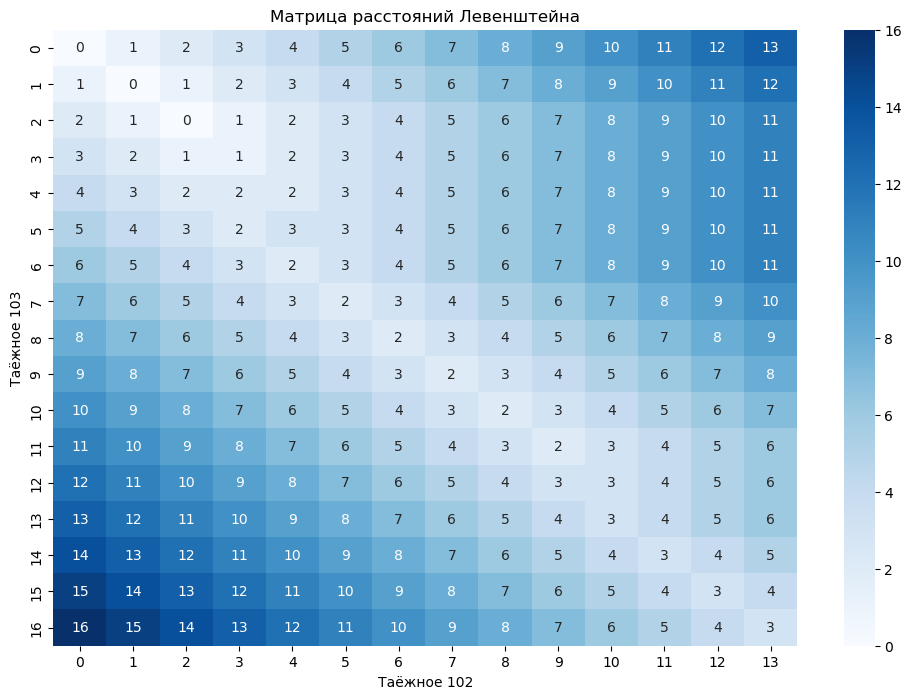

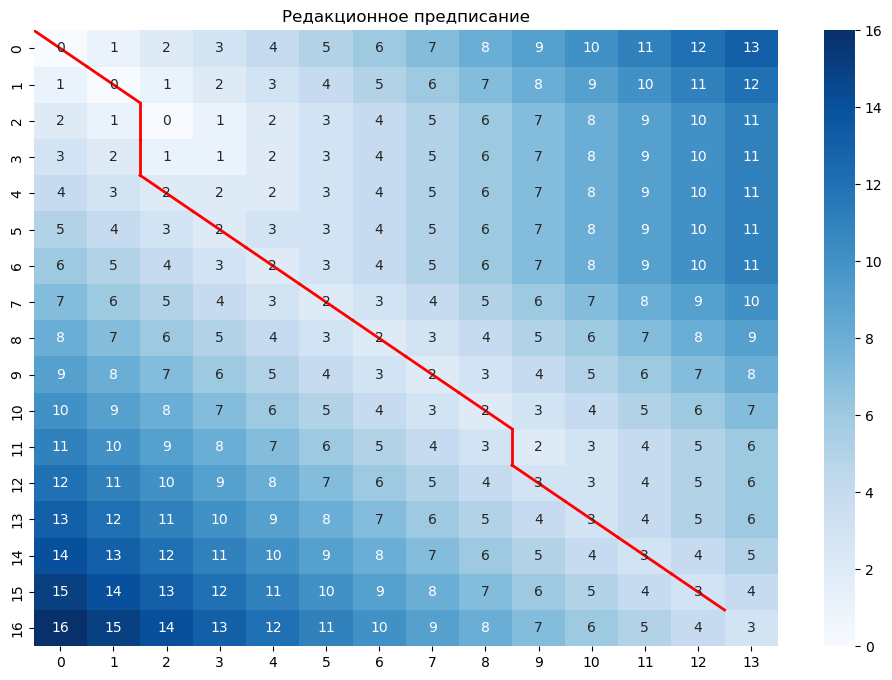


Результаты корреляции пластов:
Пласты 0 и 0 коррелируют
Пласты 1 и 1 коррелируют
Пласт 2 Таёжного 103 выклинивается
Пласт 3 Таёжного 103 выклинивается
Пласты 4 и 2 коррелируют
Пласты 5 и 3 коррелируют
Пласты 6 и 4 коррелируют
Пласты 7 и 5 коррелируют
Пласты 8 и 6 коррелируют
Пласты 9 и 7 коррелируют
Пласты 10 и 8 коррелируют
Пласт 11 Таёжного 103 выклинивается
Пласты 12 и 9 коррелируют
Пласты 13 и 10 коррелируют
Пласты 14 и 11 коррелируют
Пласты 15 и 12 коррелируют


In [140]:

# Функция для создания строк описания пород
def create_rock_description(df):
    return (df['Rock'] + ' ' + df['Color'] + ' ' + df['ТЕКСТУРА'] + ' ' + 
            df['Включения органогенные'] + ' ' + df['Включения минеральные'] + ' ' + 
            df['НЕФТЕНАСЫЩЕНИЕ'] + ' ' + df['ПОДОШВА СЛОЯ'])

# Создаем описания пород
descriptions_102 = create_rock_description(taeznaya_102)
descriptions_103 = create_rock_description(taeznaya_103)

# Расчет матрицы Левенштейна с использованием list comprehension
lev_matrix = np.zeros((len(descriptions_103)+1, len(descriptions_102)+1))
lev_matrix[0,:] = np.arange(len(descriptions_102)+1)
lev_matrix[:,0] = np.arange(len(descriptions_103)+1)

# Заполнение матрицы с использованием функции distance
for i, desc3 in enumerate(descriptions_103, 1):
    for j, desc2 in enumerate(descriptions_102, 1):
        if desc2 == desc3:
            substitution_cost = 0
        else:
            substitution_cost = 1
            
        lev_matrix[i,j] = min(
            lev_matrix[i-1,j] + 1,    # deletion
            lev_matrix[i,j-1] + 1,    # insertion
            lev_matrix[i-1,j-1] + substitution_cost  # substitution
        )

# Визуализация
plt.figure(figsize=(12, 8))
sns.heatmap(lev_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Матрица расстояний Левенштейна')
plt.xlabel('Таёжное 102')
plt.ylabel('Таёжное 103')
plt.show()

# Функция для трассировки пути
def trace_levenshtein_path(matrix, desc1, desc2):
    path = []
    i, j = matrix.shape[0]-1, matrix.shape[1]-1
    
    while i > 0 or j > 0:
        path.append((i, j))
        if i == 0:
            j -= 1
        elif j == 0:
            i -= 1
        else:
            min_val = min(matrix[i-1,j-1], matrix[i-1,j], matrix[i,j-1])
            if matrix[i-1,j-1] == min_val:
                i -= 1
                j -= 1
            elif matrix[i-1,j] == min_val:
                i -= 1
            else:
                j -= 1
    path.append((0, 0))
    return path[::-1]

# Трассировка пути
path = trace_levenshtein_path(lev_matrix, descriptions_102, descriptions_103)

# Визуализация пути
plt.figure(figsize=(12, 8))
sns.heatmap(lev_matrix, annot=True, fmt='g', cmap='Blues')
for (i1, j1), (i2, j2) in zip(path[:-1], path[1:]):
    plt.plot([j1, j2], [i1, i2], 'r-', linewidth=2)
plt.title('Редакционное предписание')
plt.show()

# Трассировка пути и определение корреляции
def trace_path_and_correlate(matrix, desc1, desc2):
    i, j = matrix.shape[0]-1, matrix.shape[1]-1
    path = []
    correlations = []
    
    while i > 0 or j > 0:
        path.append((i, j))
        if i == 0:
            correlations.append(f"Пласт {j-1} Таёжного 102 выклинивается")
            j -= 1
        elif j == 0:
            correlations.append(f"Пласт {i-1} Таёжного 103 выклинивается")
            i -= 1
        else:
            min_val = min(matrix[i-1, j-1], matrix[i-1, j], matrix[i, j-1])
            if matrix[i-1, j-1] == min_val:
                if desc1[i-1] == desc2[j-1]:
                    correlations.append(f"Пласты {i-1} и {j-1} коррелируют")
                else:
                    correlations.append(f"Пласты {i-1} и {j-1} частично коррелируют")
                i -= 1
                j -= 1
            elif matrix[i-1, j] == min_val:
                correlations.append(f"Пласт {i-1} Таёжного 103 выклинивается")
                i -= 1
            else:
                correlations.append(f"Пласт {j-1} Таёжного 102 выклинивается")
                j -= 1
    
    return path[::-1], correlations[::-1]

path, correlations = trace_path_and_correlate(lev_matrix, descriptions_103, descriptions_102)

# Вывод результатов корреляции
print("\nРезультаты корреляции пластов:")
for corr in correlations:
    print(corr)


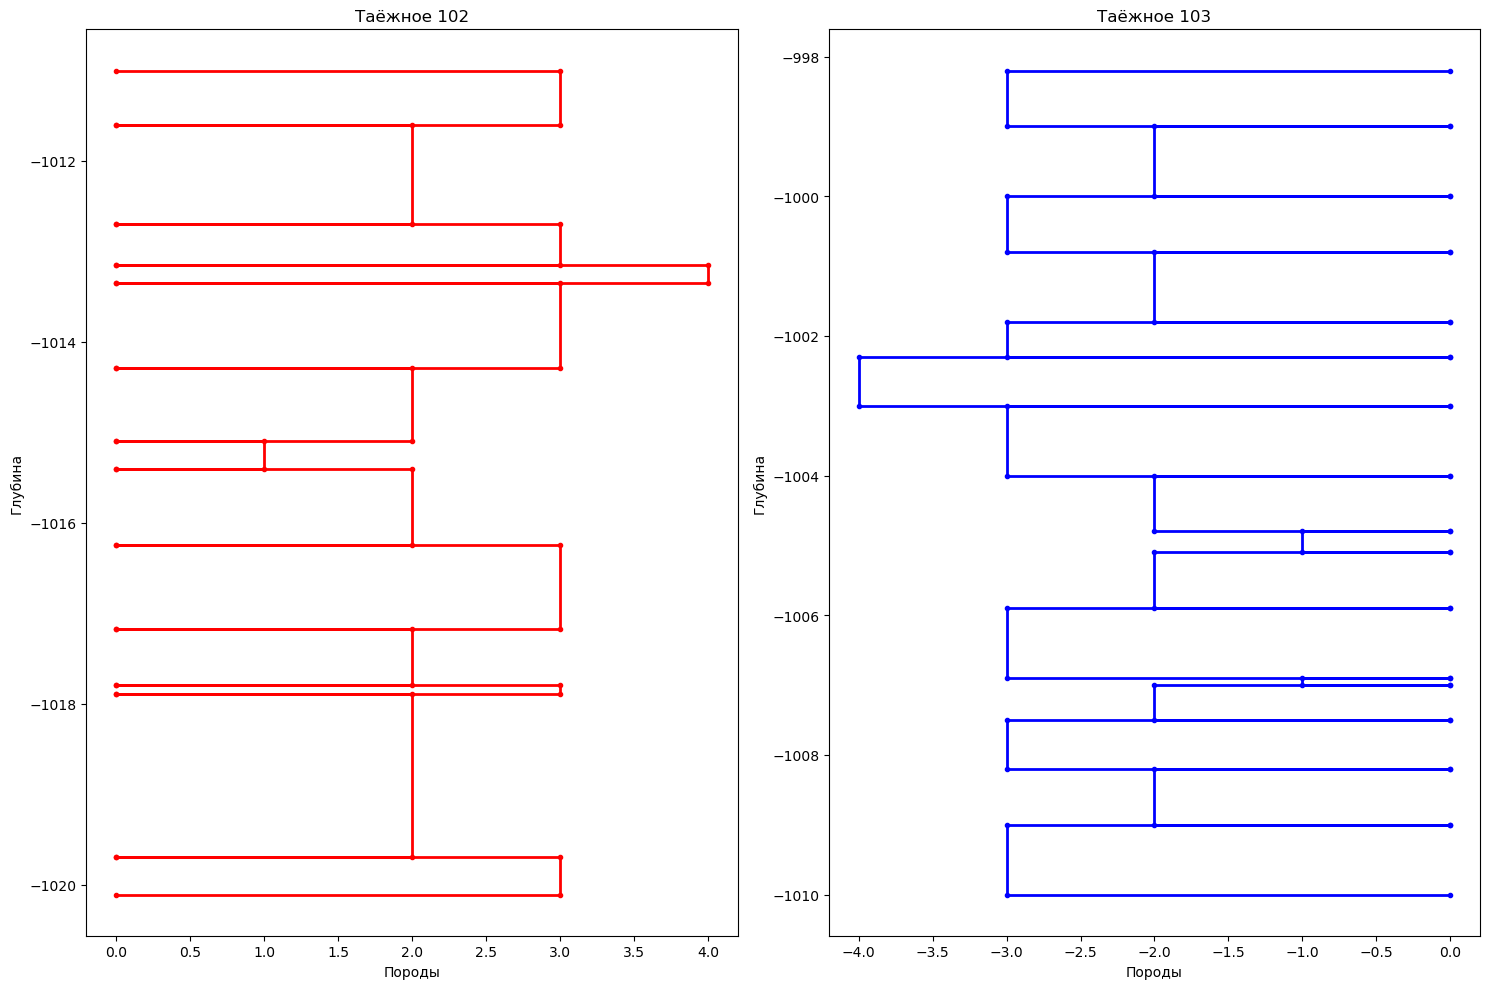

In [141]:
# Подготовка данных для визуализации скважин
def prepare_well_data(depths, rocks):
    new_depth = []
    rock_plot = []
    rock_codes = {'П': 3, 'Г': 2, 'У': 1}
    
    for i in range(len(depths)):
        if i == 0:
            new_depth.extend([depths[i], depths[i]])
        elif i == len(depths) - 1:
            new_depth.extend([depths[i], depths[i], depths[i], depths[i]])
            final_depth = depths[i] + taeznaya_102['H'].iloc[-1] if len(depths) == len(taeznaya_102) else depths[i] + taeznaya_103['H'].iloc[-1]
            new_depth.extend([final_depth, final_depth])
        else:
            new_depth.extend([depths[i], depths[i], depths[i], depths[i]])
        
        rock = rocks.iloc[i] if isinstance(rocks, pd.Series) else rocks[i]
        code = rock_codes.get(rock[0], 4) if rock else 0
        rock_plot.extend([0, code, code, 0])
    
    return [-d for d in new_depth], rock_plot

# Подготовка данных для обеих скважин
new_depth_2, rock_2_plot = prepare_well_data(taeznaya_102['Depth'], taeznaya_102['Rock'])
new_depth_3, rock_3_plot = prepare_well_data(taeznaya_103['Depth'], taeznaya_103['Rock'])
rock_3_plot = [-x for x in rock_3_plot]  # Инвертируем для второй скважины

# Визуализация скважин (как в коде №1)
fig, ax = plt.subplots(ncols=2, figsize=(15, 10))
ax[0].plot(rock_2_plot, new_depth_2, c='r', lw=2, marker='o', markersize=3)
ax[1].plot(rock_3_plot, new_depth_3, c='b', lw=2, marker='o', markersize=3)

ax[0].set_title('Таёжное 102')
ax[1].set_title('Таёжное 103')
ax[0].set_xlabel('Породы')
ax[1].set_xlabel('Породы')
ax[0].set_ylabel('Глубина')
ax[1].set_ylabel('Глубина')



plt.tight_layout()
plt.show()



In [142]:
taeznaya_102 = taeznaya_102[::-1]
index_102 = range(1,14,1)
taeznaya_102.index = index_102

In [143]:
taeznaya_103 = taeznaya_103[::-1]
index_103 = range(1,17,1)
taeznaya_103.index = index_103

C:\Users\1\AppData\Local\Temp\ipykernel_3972\3746503330.py:138: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


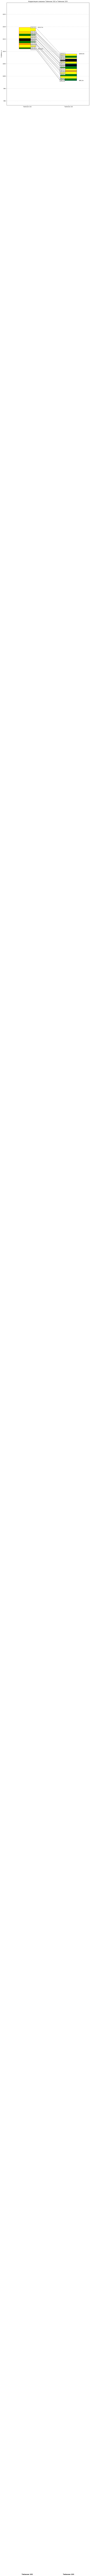

In [166]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

# Подготовка данных для визуализации скважин
def prepare_well_data(df):
    # Сортируем данные по глубине в прямом порядке (от наименьшей к наибольшей)
    df_sorted = df.sort_values('Depth', ascending=True)
    
    # Вычисляем границы пластов на основе реальных глубин
    boundaries = []
    for i, depth in enumerate(df_sorted['Depth']):
        if i == 0:
            # Для самого верхнего пласта верхняя граница - его глубина
            boundaries.append(depth)
        else:
            # Для остальных пластов верхняя граница - это глубина предыдущего пласта
            boundaries.append(df_sorted['Depth'].iloc[i-1])
    
    # Нижняя граница - это глубина текущего пласта
    rock_info = []
    for i in range(len(df_sorted)):
        depth = df_sorted['Depth'].iloc[i]
        base = depth
        top = boundaries[i]
        rock = df_sorted['Rock'].iloc[i]
        h = base - top
        rock_info.append({'top': top, 'base': base, 'rock': rock, 'depth': depth, 'h': h})
    
    return rock_info

# Подготовка данных для обеих скважин
taeznaya_102_data = prepare_well_data(taeznaya_102)
taeznaya_103_data = prepare_well_data(taeznaya_103)

# Создаем фигуру
fig, ax = plt.subplots(figsize=(12, 15))

# Цвета для пород
rock_colors = {
    'Песчаники крупнозернистые': 'yellow',
    'Известняки песчанистые': 'orange',
    'Глины': 'green',
    'Угли': 'black'
}

# Функция для рисования колонки
def draw_well(ax, x, well_data, well_name, color='black'):
    width = 0.4
    for layer in well_data:
        rock = layer['rock']
        top = layer['top']
        base = layer['base']
        height = base - top
        
        # Определяем цвет
        fill_color = 'white'
        for rock_type, col in rock_colors.items():
            if rock_type in rock:
                fill_color = col
                break
        
        # Рисуем прямоугольник (используем положительные значения глубин)
        rect = Rectangle((x - width/2, top), width, height, 
                        linewidth=1, edgecolor=color, facecolor=fill_color)
        ax.add_patch(rect)
        
        # Подписываем глубину
        if layer == well_data[0]:  # верхний слой (самый мелкий)
            ax.text(x + width/2 + 0.05, top, f'{top:.1f}m', va='center')
        if layer == well_data[-1]:  # нижний слой (самый глубокий)
            ax.text(x + width/2 + 0.05, base, f'{base:.1f}m', va='center')
    
    # Подпись скважины
    ax.text(x, -10, well_name, ha='center', va='top', fontsize=12, weight='bold')

# Рисуем обе скважины
draw_well(ax, 1, taeznaya_102_data, 'Таёжное 102', 'red')
draw_well(ax, 2, taeznaya_103_data, 'Таёжное 103', 'blue')

# Определяем корреляционные пары на основе результатов из кода №1
correlation_pairs = []
for corr in correlations:
    if "коррелируют" in corr:
        parts = corr.split()
        layer_103 = int(parts[1])
        layer_102 = int(parts[3])
        correlation_pairs.append((layer_102, layer_103))

# Функция для нахождения соответствующей границы в другой скважине
def find_corresponding_boundary(depth, well_data):
    for layer in well_data:
        if abs(layer['top'] - depth) < 0.1 or abs(layer['base'] - depth) < 0.1:
            return layer['top'] if abs(layer['top'] - depth) < 0.1 else layer['base']
    return depth  # если не нашли, возвращаем исходную глубину

# Рисуем корреляционные кривые между границами пластов
for pair in correlation_pairs:
    try:
        layer_102 = taeznaya_102_data[pair[0]]
        layer_103 = taeznaya_103_data[pair[1]]
        
        # Координаты верхних и нижних границ пластов (используем положительные значения)
        x1_top, y1_top = 1 + 0.2, layer_102['top']  # Верх границы пласта 102
        x1_base, y1_base = 1 + 0.2, layer_102['base']  # Низ границы пласта 102
        
        x2_top, y2_top = 2 - 0.2, layer_103['top']  # Верх границы пласта 103
        x2_base, y2_base = 2 - 0.2, layer_103['base']  # Низ границы пласта 103
        
        # Рисуем линии между верхними и нижними границами
        ax.plot([x1_top, x2_top], [y1_top, y2_top], 'k--', lw=1, alpha=0.7)  # Верхние границы
        ax.plot([x1_base, x2_base], [y1_base, y2_base], 'k--', lw=1, alpha=0.7)  # Нижние границы
        
        # Подписи глубин на корреляционных кривых
        ax.text(x1_top, y1_top, f"{y1_top:.1f}m", 
                ha='right', va='center', fontsize=8, bbox=dict(facecolor='white', alpha=0.7))
        ax.text(x1_base, y1_base, f"{y1_base:.1f}m", 
                ha='right', va='center', fontsize=8, bbox=dict(facecolor='white', alpha=0.7))
        ax.text(x2_top, y2_top, f"{y2_top:.1f}m", 
                ha='left', va='center', fontsize=8, bbox=dict(facecolor='white', alpha=0.7))
        ax.text(x2_base, y2_base, f"{y2_base:.1f}m", 
                ha='left', va='center', fontsize=8, bbox=dict(facecolor='white', alpha=0.7))
    except IndexError:
        # Если пласт отсутствует в одной из скважин, пропускаем
        continue

# Настройки графика
ax.set_xlim(0.5, 2.5)
max_depth = max(taeznaya_103_data[-1]['base'], taeznaya_102_data[-1]['base'])  # Берем максимальную глубину
min_depth = min(taeznaya_103_data[0]['top'], taeznaya_102_data[0]['top'])  # Берем минимальную глубину
ax.set_ylim(min_depth - 10, max_depth + 10)
ax.set_ylabel('Глубина, м')
ax.set_xticks([1, 2])
ax.set_xticklabels(['Таёжное 102', 'Таёжное 103'])
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.title('Корреляция скважин Таёжное 102 и Таёжное 103')
plt.tight_layout()
plt.show()

C:\Users\1\AppData\Local\Temp\ipykernel_3972\3175697990.py:131: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


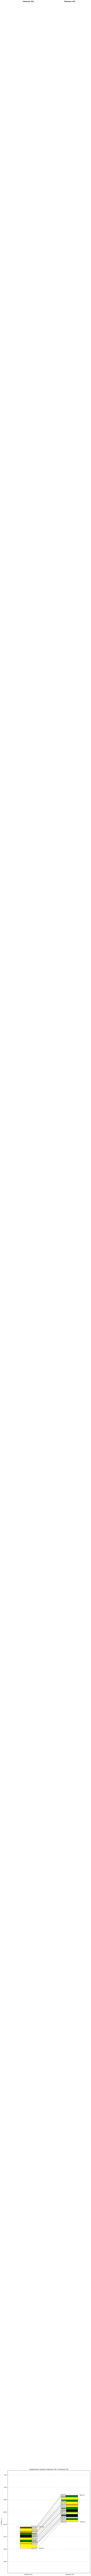

In [174]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

# Подготовка данных для визуализации скважин
def prepare_well_data(df):
    # Сортируем данные по глубине в прямом порядке (от наименьшей к наибольшей)
    df_sorted = df.sort_values('Depth', ascending=True)
    
    # Вычисляем границы пластов на основе реальных глубин
    boundaries = []
    for i, depth in enumerate(df_sorted['Depth']):
        if i == 0:
            # Для самого верхнего пласта верхняя граница - его глубина
            boundaries.append(depth)
        else:
            # Для остальных пластов верхняя граница - это глубина предыдущего пласта
            boundaries.append(df_sorted['Depth'].iloc[i-1])
    
    # Нижняя граница - это глубина текущего пласта
    rock_info = []
    for i in range(len(df_sorted)):
        depth = df_sorted['Depth'].iloc[i]
        base = depth
        top = boundaries[i]
        rock = df_sorted['Rock'].iloc[i]
        h = base - top
        rock_info.append({'top': top, 'base': base, 'rock': rock, 'depth': depth, 'h': h})
    
    return rock_info

# Подготовка данных для обеих скважин
taeznaya_102_data = prepare_well_data(taeznaya_102)
taeznaya_103_data = prepare_well_data(taeznaya_103)

# Создаем фигуру
fig, ax = plt.subplots(figsize=(12, 15))

# Цвета для пород
rock_colors = {
    'Песчаники крупнозернистые': 'yellow',
    'Известняки песчанистые': 'orange',
    'Глины': 'green',
    'Угли': 'black'
}

# Функция для рисования колонки
def draw_well(ax, x, well_data, well_name, color='black'):
    width = 0.4
    for layer in well_data:
        rock = layer['rock']
        top = layer['top']
        base = layer['base']
        height = base - top
        
        # Определяем цвет
        fill_color = 'white'
        for rock_type, col in rock_colors.items():
            if rock_type in rock:
                fill_color = col
                break
        
        # Рисуем прямоугольник (используем положительные значения глубин)
        rect = Rectangle((x - width/2, -base), width, height, 
                        linewidth=1, edgecolor=color, facecolor=fill_color)
        ax.add_patch(rect)
        
        # Подписываем глубину (отрицательные значения для правильного отображения)
        if layer == well_data[0]:  # верхний слой (самый мелкий)
            ax.text(x + width/2 + 0.05, -top, f'{top:.1f}m', va='center')
        if layer == well_data[-1]:  # нижний слой (самый глубокий)
            ax.text(x + width/2 + 0.05, -base, f'{base:.1f}m', va='center')
    
    # Подпись скважины
    ax.text(x, 10, well_name, ha='center', va='bottom', fontsize=12, weight='bold')

# Рисуем обе скважины
draw_well(ax, 1, taeznaya_102_data, 'Таёжное 102', 'red')
draw_well(ax, 2, taeznaya_103_data, 'Таёжное 103', 'blue')

# Определяем корреляционные пары на основе результатов из кода №1
correlation_pairs = []
for corr in correlations:
    if "коррелируют" in corr:
        parts = corr.split()
        layer_103 = int(parts[1])
        layer_102 = int(parts[3])
        correlation_pairs.append((layer_102, layer_103))

# Рисуем корреляционные кривые между границами пластов
for pair in correlation_pairs:
    try:
        layer_102 = taeznaya_102_data[pair[0]]
        layer_103 = taeznaya_103_data[pair[1]]
        
        # Координаты верхних и нижних границ пластов (используем отрицательные значения для инверсии оси)
        x1_top, y1_top = 1 + 0.2, -layer_102['top']  # Верх границы пласта 102
        x1_base, y1_base = 1 + 0.2, -layer_102['base']  # Низ границы пласта 102
        
        x2_top, y2_top = 2 - 0.2, -layer_103['top']  # Верх границы пласта 103
        x2_base, y2_base = 2 - 0.2, -layer_103['base']  # Низ границы пласта 103
        
        # Рисуем линии между верхними и нижними границами
        ax.plot([x1_top, x2_top], [y1_top, y2_top], 'k--', lw=1, alpha=0.7)  # Верхние границы
        ax.plot([x1_base, x2_base], [y1_base, y2_base], 'k--', lw=1, alpha=0.7)  # Нижние границы
        
        # Подписи глубин на корреляционных кривых
        ax.text(x1_top, y1_top, f"{layer_102['top']:.1f}m", 
                ha='right', va='center', fontsize=8, bbox=dict(facecolor='white', alpha=0.7))
        ax.text(x1_base, y1_base, f"{layer_102['base']:.1f}m", 
                ha='right', va='center', fontsize=8, bbox=dict(facecolor='white', alpha=0.7))
        ax.text(x2_top, y2_top, f"{layer_103['top']:.1f}m", 
                ha='left', va='center', fontsize=8, bbox=dict(facecolor='white', alpha=0.7))
        ax.text(x2_base, y2_base, f"{layer_103['base']:.1f}m", 
                ha='left', va='center', fontsize=8, bbox=dict(facecolor='white', alpha=0.7))
    except IndexError:
        # Если пласт отсутствует в одной из скважин, пропускаем
        continue

# Настройки графика
ax.set_xlim(0.5, 2.5)
max_depth = max(taeznaya_103_data[-1]['base'], taeznaya_102_data[-1]['base'])  # Берем максимальную глубину
min_depth = min(taeznaya_103_data[0]['top'], taeznaya_102_data[0]['top'])  # Берем минимальную глубину
ax.set_ylim(-max_depth - 10, -min_depth + 10)  # Инвертируем ось Y
ax.set_ylabel('Глубина, м')
ax.set_xticks([1, 2])
ax.set_xticklabels(['Таёжное 102', 'Таёжное 103'])
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.title('Корреляция скважин Таёжное 102 и Таёжное 103')
plt.tight_layout()
plt.show()